# **CUSTOMER CHURN PREDICTION FOR SYRIATEL**

## **BUSINESS UNDERSTANDING**

### Project Overview
The goal of this project is to build a classifier that predicts whether a customer will "churn" stop doing business with SyriaTel, a telecommunications company.
This is a binary classification problem, where the model will predict customer churn based on various features. By analyzing historical customer data, we aim to uncover patterns and factors that are indicative of customer churn. This will enable SyriaTel to take proactive steps to retain customers and reduce potential revenue loss.
Churn prediction is crucial for the company to implement retention strategies and improve customer satisfaction.


### Business Problem
 To predict whether a customer will churn (stop doing business with SyriaTel). 

- Understanding customer churn is critical for SyriaTel to minimize revenue loss and enhance customer loyalty. By identifying the patterns and factors that lead to churn, SyriaTel can implement targeted retention strategies, improve overall customer satisfaction, and reduce the financial impact of losing customers. 

### Stakeholders
- **Primary Stakeholder**: SyriaTel, a telecommunications company interested in reducing customer churn and improving customer retention.
- **Secondary Stakeholders**:
  - **Customer Service Teams**: To develop strategies and interventions for retaining customers identified as high risk.
  - **Marketing Teams**: To create targeted campaigns and offers aimed at at-risk customers.
  - **Financial Analysts**: To evaluate the financial impact of customer churn and measure the effectiveness of retention strategies.

### Project Objectives
This project aims to achieve the following:

1. Develop a Churn Prediction Model-
 Build an effective classification model to predict customer churn for SyriaTel.
2. Evaluate Model Performance -
Assess the model's effectiveness using appropriate metrics for imbalanced data (e.g., Precision, Recall, F1-Score, ROC AUC).
3. Identify Key Churn Drivers -
 Determine which customer attributes and behaviors are most significant in predicting churn.
4. Propose Actionable Retention Strategies - 
Formulate data-driven recommendations for SyriaTel to reduce customer attrition.

### Key Business Questions
To address the overarching business problem, this project will seek to answer the following key questions:

1. Which customers are most likely to churn in the near future?
2. What characteristics or behaviors differentiate customers who churn from those who don't?
3. How effectively can we predict churn before it happens, and what are the trade-offs of our predictions?
4. How can insights from this model inform our customer retention strategies to reduce revenue loss for SyriaTel?

## **DATA UNDERSTANDING**

### Data Overview
The dataset for this project contains over 3,000 customer records from SyriaTel, a telecommunications provider. Each row represents an individual customer and includes attributes such as demographics, service subscriptions, usage patterns, and customer support interactions. The target variable is “Churn,” indicating whether a customer has discontinued the service. The target variable,churn is binary categorical variable where: 'True' : Indicates the customer churned 'False' : Indicates the customer did not churn. Data was provided in a single CSV file. Initial cleaning involved handling missing values, correcting data types, and encoding categorical variables. Further exploration and feature engineering were performed within the same notebook to prepare the data for modeling.


### Data Description
The dataset contains the following features:
- `state`: State where the customer resides.Geographic factors might influence churn, especially if different regions have varying levels of service quality or pricing.
- `account length`: The length of the customer’s account.Longer account lengths might be associated with lower churn rates.
- `area code`: The area code of the customer's phone number
- `phone number`: Customer’s phone number
- `international plan`: Whether the customer has an international plan.The presence of this plan could affect churn rates based on its perceived value.
- `voice mail plan`: Whether the customer has a voice mail plan
- `number vmail messages`: Number of voice mail messages
- `total day minutes`: Total minutes of day calls
- `total day calls`: Total number of day calls
- `total day charge`: Total charge for day calls
- `total eve minutes`: Total minutes of evening calls
- `total eve calls`: Total number of evening calls
- `total eve charge`: Total charge for evening calls
- `total night minutes`: Total minutes of night calls
- `total night calls`: Total number of night calls
- `total night charge`: Total charge for night calls
- `total intl minutes`: Total minutes of international calls
- `total intl calls`: Total number of international calls
- `total intl charge`: Total charge for international calls
  
  These features quantify the amount of time spent on calls during different times of the day. Higher usage might indicate higher satisfaction or, conversely, higher bills, which could impact churn.
- `customer service calls`: Number of customer service calls.A high number of service calls might indicate issues that could lead to churn.
- `churn`: Target variable indicating whether the customer has churned (TRUE/FALSE)

### Data Sources and Collection
The dataset was collected through various customer interaction channels, including service usage logs, billing information, and customer service interactions. The collection methods include automated data capture from CRM systems and manual entries from customer service records.

Dataset located at :

[Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and imported as a CSV file. It contains over 3,000 records of customer attributes and churn behavior.


### Data Exploration

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score




In [2]:
# Load the dataset
df = pd.read_csv('data/churn.csv')


# Preview the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Display descriptive statistics for numerical columns
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Display the distribution of the 'churn' variable
display(df['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64

**Observations:**

The target variable `churn` is imbalanced, with a majority of customers not churning. This imbalance may impact model performance and will need to be addressed during model training and evaluation.


In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#### Distribution of the Target Variable

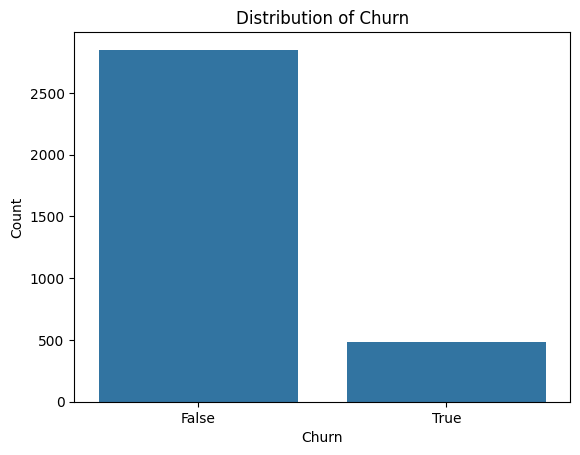

In [7]:
# Plot for Distribution of Churn to understand the proportion of customers who have churned vs those who haven't

sns.countplot(data=df,  x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Observations:**

- There is a significant imbalance between the two classes. The majority of customers have remained with the service (churn = False), while a
  much smaller proportion have churned (churn = True). This imbalance can pose challenges in model training and evaluation, as it may lead to biased predictions.
- False (Not Churned): Approximately 2,800 customers
- True (Churned): Approximately 500 customers

#### Exploring Categorical Feature Distributions


In [8]:
# Display the distribution of categorical columns
print("Distribution of 'state':")
display(df['state'].value_counts())

print("\nDistribution of 'area code':")
display(df['area code'].value_counts())

print("\nDistribution of 'international plan':")
display(df['international plan'].value_counts())

print("\nDistribution of 'voice mail plan':")
display(df['voice mail plan'].value_counts())

Distribution of 'state':


state
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64


Distribution of 'area code':


area code
415    1655
510     840
408     838
Name: count, dtype: int64


Distribution of 'international plan':


international plan
no     3010
yes     323
Name: count, dtype: int64


Distribution of 'voice mail plan':


voice mail plan
no     2411
yes     922
Name: count, dtype: int64

### Summary of Categorical Feature Distributions

- The **'state'** feature is fairly spread out across many states, though some states (e.g., WV, MN, NY) have slightly higher representation.
- The **'area code'** feature is limited to three main codes: 415, 510, and 408, with 415 being the most common.
- The **'international plan'** and **'voice mail plan'** features indicate that the majority of customers do **not** subscribe to these plans.
- These imbalances may influence churn behavior and will be important to monitor during modeling and feature importance evaluation.


#### Relationship Between Categorical Features And Churn

In [18]:
# Relationship between 'international plan' and 'churn'
print("Churn rate by 'international plan':")
display(df.groupby('international plan')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'voice mail plan' and 'churn'
print("\nChurn rate by 'voice mail plan':")
display(df.groupby('voice mail plan')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'international plan':


churn,False,True
international plan,,
no,0.885050,0.114950
yes,0.575851,0.424149



Churn rate by 'voice mail plan':


churn,False,True
voice mail plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


We examined the relationship between churn and two categorical variables: `international plan` and `voice mail plan`.

- **International Plan**: Customers with an international plan show a much higher churn rate (42.4%) than those without (11.5%). This suggests a strong positive association between having an international plan and likelihood of churn.
  
- **Voice Mail Plan**: Customers with a voice mail plan churn less (8.7%) compared to those without one (16.7%), suggesting a potential protective effect.

These insights highlight customer segments that may need targeted retention strategies.


#### Churn Rate By International Plan And Voice Mail Plan

C:\Users\Admin\AppData\Local\Temp\ipykernel_22380\99544453.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='international plan', y='churn', data=df, ci=None)


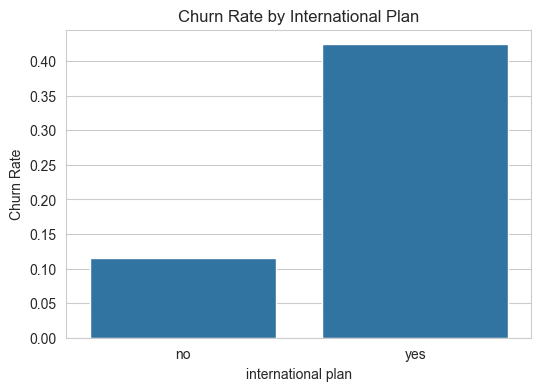

C:\Users\Admin\AppData\Local\Temp\ipykernel_22380\99544453.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)


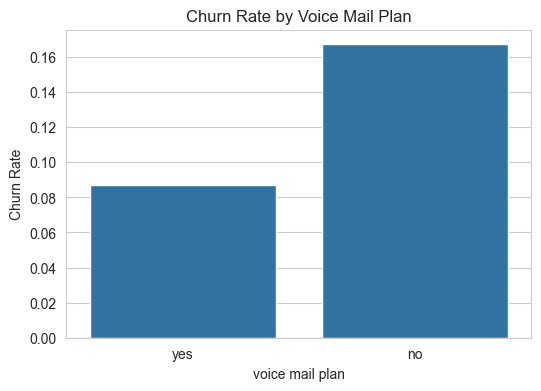

In [19]:

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'international plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='international plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by International Plan')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rate by 'voice mail plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.show()

**Summary: Relationship Between Plans and Churn**

An analysis of churn rates across the **'international plan'** and **'voice mail plan'** features revealed key differences:

- **International Plan**:
  - Customers **with** an international plan have a **higher churn rate** (**42.4%**).
  - Customers **without** an international plan have a much **lower churn rate** (**11.5%**).
  - ➤ This indicates that subscribing to the international plan is a strong churn signal.

- **Voice Mail Plan**:
  - Customers **with** a voice mail plan churn **less** (**8.7%**).
  - Customers **without** a voice mail plan churn **more** (**16.7%**).
  - ➤ This suggests that voice mail features may be linked to higher customer satisfaction or retention.

**Conclusion**: Both features are potentially valuable predictors of churn and should be considered during feature selection and modeling.


#### Churn Rate by State and Area Code

In [20]:
# Relationship between 'state' and 'churn'
print("Churn rate by 'state':")
display(df.groupby('state')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'area code' and 'churn'
print("\nChurn rate by 'area code':")
display(df.groupby('area code')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'state':


churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541



Churn rate by 'area code':


churn,False,True
area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


**Summary: Churn Rate By State and Area Code**
Churn by State:
- Churn rates **vary significantly** across different U.S. states.
- For example:
  - **Highest churn rates**: CA (26.5%), NJ (26.5%), TX (25%), SC (23.3%), MD (24.3%)
  - **Lowest churn rates**: HI (5.7%), AK (5.8%), AZ (6.3%), IA (6.8%)
- ➤ This suggests that **geographic location** could influence churn, potentially due to market conditions, service availability, or customer expectations.

#### 🔹 Churn by Area Code:
- Churn rates are **fairly consistent** across area codes:
  - 408 → 14.6%
  - 415 → 14.3%
  - 510 → 14.9%
- ➤ This consistency indicates that **area code alone is likely not a strong predictor** of churn.

**Conclusion**: While **state-level geography** may hold some predictive power for churn, **area code** appears less impactful. Consider one-hot encoding for 'state' and carefully evaluating its importance during feature selection.

#### Top 10 States With Highest Churn Rate

C:\Users\Admin\AppData\Local\Temp\ipykernel_22380\2582359762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_churn_states.index, y=True, data=top_10_churn_states, palette='viridis')


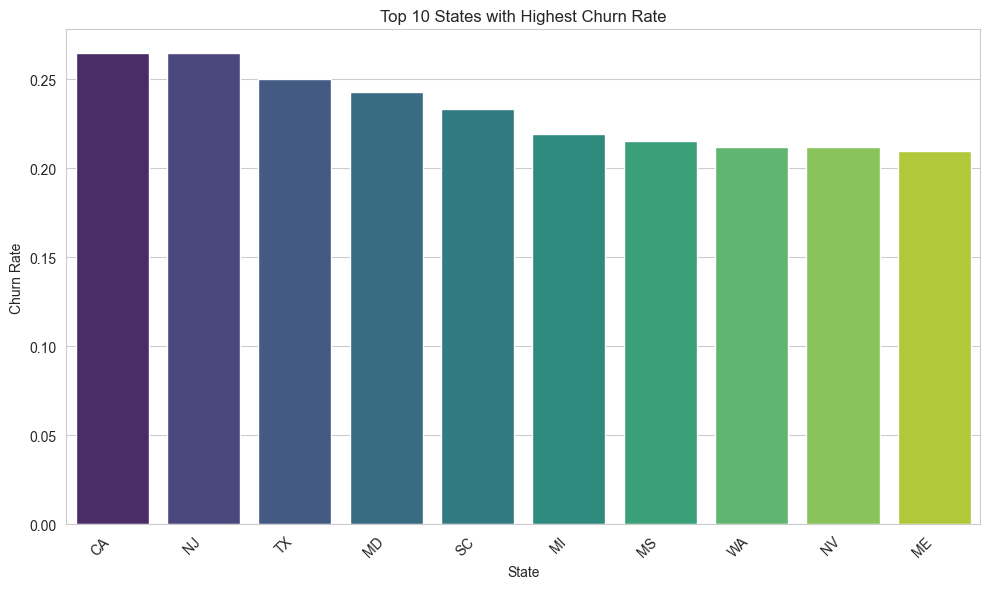

In [21]:

# Calculate churn rate by state
state_churn = df.groupby('state')['churn'].value_counts(normalize=True).unstack()

# Calculate and sort states by churn rate (True column)
state_churn[True] = state_churn[True].fillna(0) # Fill NaN with 0 for states with no churn
top_10_churn_states = state_churn.sort_values(by=True, ascending=False).head(10)

# Plot churn rate for the top 10 states
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_churn_states.index, y=True, data=top_10_churn_states, palette='viridis')
plt.title('Top 10 States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

**Summary: Top 10 States by Churn Rate**

The bar plot highlights the **top 10 U.S. states with the highest churn rates** in the SyriaTel dataset.

- **Key Observations**:
  - States like **New Jersey (NJ)**, **California (CA)**, **Texas (TX)**, and **Maryland (MD)** show significantly higher churn rates compared to the national average.
  - This indicates **geographical disparities** in customer retention, suggesting that localized issues or market conditions might be influencing churn behavior.

- **Business Insight**:
  - SyriaTel may benefit from conducting **region-specific investigations** or deploying **targeted customer retention strategies** in these high-churn states.
  - While the `state` variable may not be the strongest standalone predictor due to sample size variability and categorical spread, it offers **valuable strategic direction** when combined with other churn indicators.


#### Churn Rate By Area Code

C:\Users\Admin\AppData\Local\Temp\ipykernel_22380\1587476463.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area code', y='churn', data=df, ci=None)


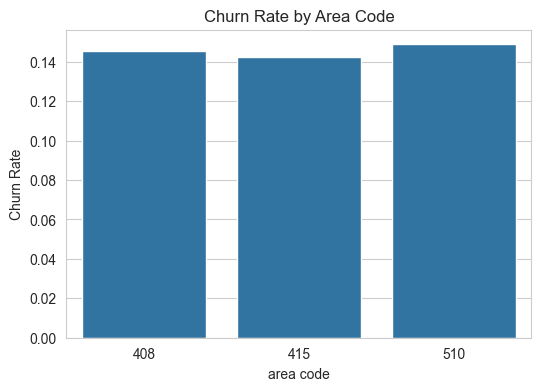

In [22]:

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'area code'
plt.figure(figsize=(6, 4))
sns.barplot(x='area code', y='churn', data=df, ci=None)
plt.title('Churn Rate by Area Code')
plt.ylabel('Churn Rate')
plt.show()

**Summary: Churn Rate by Area Code**

The bar plot illustrates churn rates across the three area codes: **408**, **415**, and **510**.

- **Key Observations**:
  - The churn rates are **remarkably similar** across all area codes.
  - This suggests that `area code` does **not significantly influence** customer churn in this dataset.

- **Conclusion**:
  - While geographic factors like state may reveal useful patterns, **area code alone is unlikely to be a strong predictor** of churn and may hold limited value in modeling.


 #### Relationship Between Numerical Features And Churn

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation of numerical features with 'churn'
print("Correlation with 'churn':")
display(correlation_matrix['churn'].sort_values(ascending=False))

Correlation with 'churn':


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

**Summary: Correlation Between Numerical Features and Churn**

Correlation analysis reveals how strongly each numerical feature is linearly associated with churn.

- **Top Positively Correlated Features**:
  - `customer service calls` (0.21)
  - `total day minutes` & `total day charge` (~0.21)
  - These suggest that customers who frequently call customer service or have high daytime usage are **more likely to churn**.

- **Notable Negative Correlation**:
  - `number vmail messages` (-0.09)
  - Indicates that customers who use voicemail are **slightly less likely to churn**, supporting earlier findings on the voice mail plan.

- **Other Features**:
  - Most other numerical variables show **weak or negligible correlation** with churn.

>  **Insight**: These correlations provide a useful starting point for feature selection in modeling, particularly emphasizing service interactions and daytime activity.


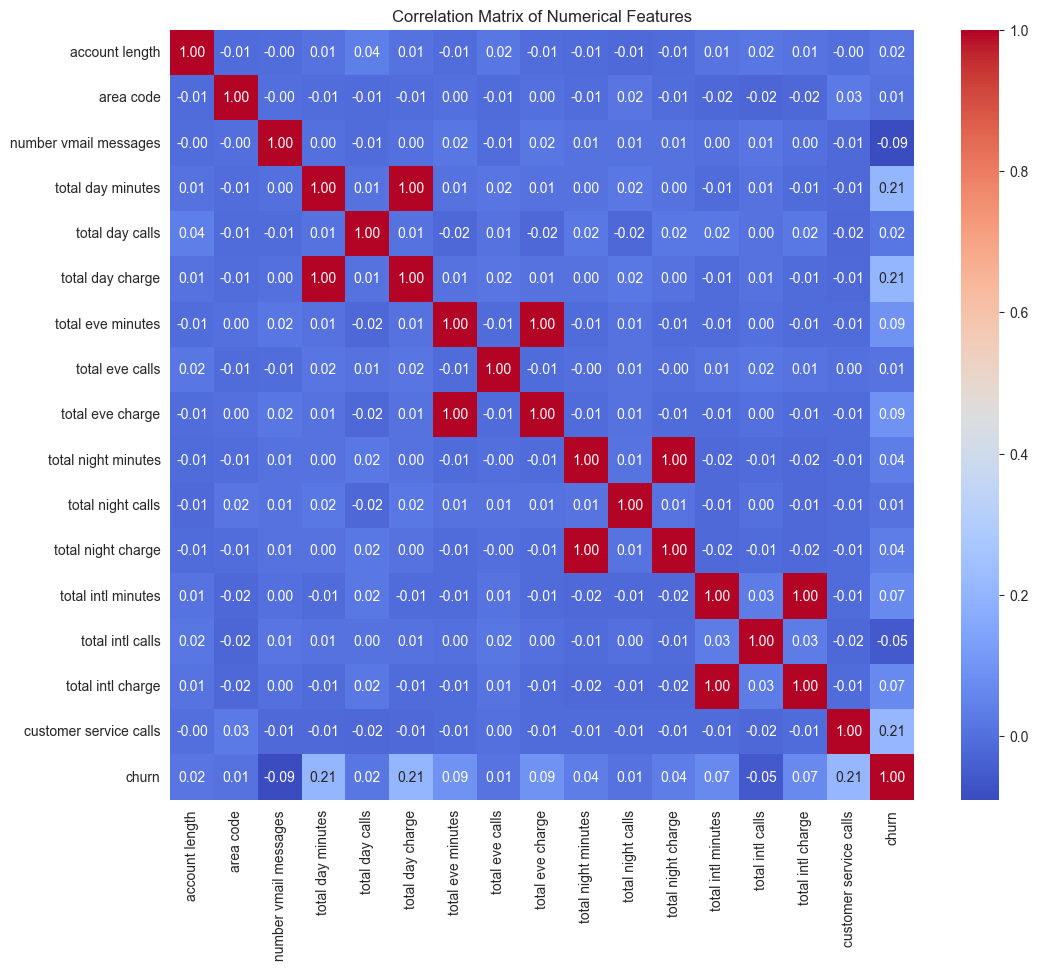

In [24]:

# Calculate the correlation matrix 
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Summary: Correlation Heatmap Insights**

The heatmap visualizes linear relationships between numerical features and churn:

- **  Strong Positive Correlation with Churn**:
  - `customer service calls`, `total day minutes`, and `total day charge` show higher positive correlations with churn, confirming their potential as churn indicators.

- ** Weak Negative Correlation**:
  - `number vmail messages` shows a slight negative correlation with churn, hinting that voicemail users are marginally less likely to churn.

- ** High Inter-feature Correlation**:
  - Usage and charge features (e.g., `total day minutes` & `total day charge`) are strongly correlated, as charges are calculated from usage.

- ** Overall Weak Correlation Elsewhere**:
  - Most other features display low correlations with churn or with each other, suggesting potential non-linear relationships or independent effects.

>  **Conclusion**: This visual reinforces earlier numerical findings and helps identify potential features for model input or engineering.


In [25]:
# Identify top 3 features that have the highest correlation with churn

top_3_features = correlation_matrix['churn'].abs().sort_values(ascending=False)[1:4]
print("Top 3 features that have the highest correlation with churn:\n",top_3_features)

Top 3 features that have the highest correlation with churn:
 customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
Name: churn, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_22380\1974902046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette='viridis')


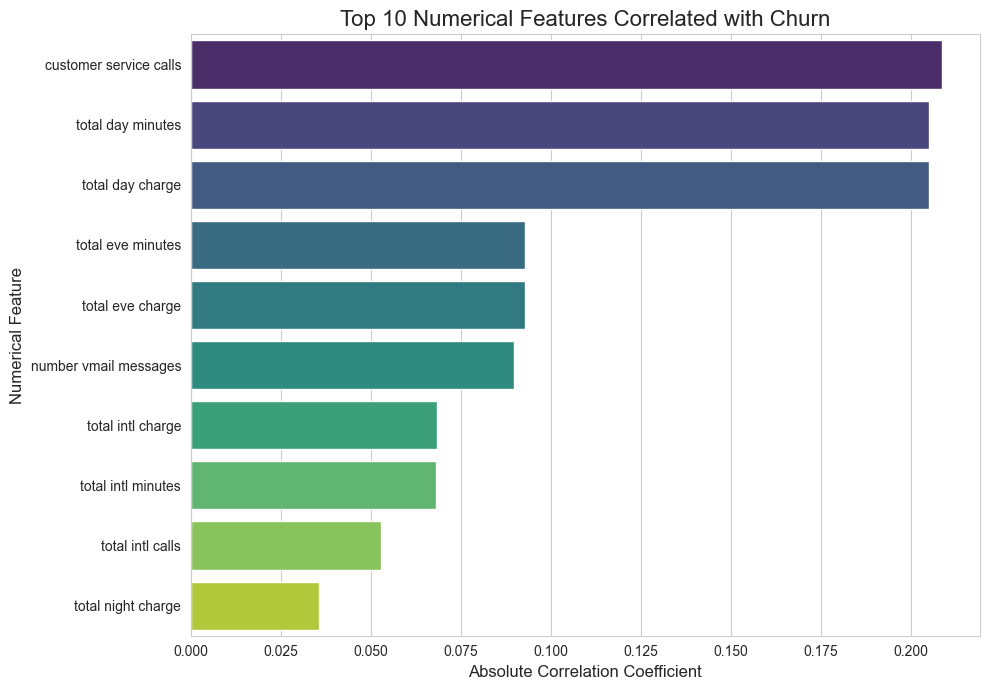

In [26]:


# Get the absolute correlation of all numerical features with 'churn'
churn_correlations = correlation_matrix['churn'].abs().sort_values(ascending=False)

# Exclude the correlation of 'churn' with itself
churn_correlations = churn_correlations.drop('churn')

# Select the top N features for visualization (e.g., top 10 or 15)
top_n = 10
top_correlated_features = churn_correlations.head(top_n)

# Create a bar plot of the top correlated features
plt.figure(figsize=(10, 7))
sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette='viridis')

# Set plot title and labels
plt.title(f'Top {top_n} Numerical Features Correlated with Churn', fontsize=16)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.ylabel('Numerical Feature', fontsize=12)

plt.tight_layout()
plt.show()

**Summary:**

The data shows the top three features that have the highest correlation with 'churn'. These features and their correlation coefficients are:

- Customer service calls: 0.208750

- Total day minutes: 0.205151

- Total day charge: 0.205151

The diagram also backs up the output we have just seen.
This indicates that among the features analyzed, customer service calls, total day minutes, and total day charge have the strongest positive linear relationship with customer churn, with customer service calls having a slightly higher correlation than the other two. In simpler terms, as the number of customer service calls, total day minutes, and total day charge increase, the likelihood of customer churn also tends to increase.

#### Inferential Statistics: T-Test Results for Numerical Features


In [27]:

# Separate data into churned and non-churned groups
churned = df[df['churn'] == True]
not_churned = df[df['churn'] == False]

# List of key numerical features to test
numerical_features = [
    'total day minutes',
    'total day charge', # Highly correlated with total day minutes, but good to test
    'customer service calls',
    'total eve minutes',
    'total eve charge',
    'total night minutes',
    'total night charge',
    'total intl minutes',
    'total intl charge',
    'account length',
    'number vmail messages',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls',
]


print("Performing independent samples t-tests for key numerical features:\n")

for feature in numerical_features:
    # Perform the t-test
    t_stat, p_value = ttest_ind(churned[feature], not_churned[feature], equal_var=False, nan_policy='omit')

    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant difference in means between churned and non-churned customers.")
    else:
        print("  Conclusion: No statistically significant difference in means between churned and non-churned customers.")
    print("-" * 30)

Performing independent samples t-tests for key numerical features:

Feature: total day minutes
  T-statistic: 9.6846
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total day charge
  T-statistic: 9.6845
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: customer service calls
  T-statistic: 8.9551
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve minutes
  T-statistic: 5.2724
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve charge
  T-statistic: 5.2720
  P-value: 0.0000
  Conclusion: Statistically significant difference in mean

**Summary: T-Tests on Key Numerical Features**

Independent samples t-tests were conducted to assess whether the means of various numerical features differ significantly between churned and non-churned customers.

####  Statistically Significant Differences (p < 0.05):

| Feature                  | T-Statistic | P-Value | Conclusion                                                |
|--------------------------|-------------|---------|-----------------------------------------------------------|
| total day minutes        | 9.6846      | 0.0000  | Strong evidence of a mean difference in day usage.        |
| total day charge         | 9.6845      | 0.0000  | Charges differ significantly with churn status.           |
| customer service calls   | 8.9551      | 0.0000  | Churned customers contact customer service more often.    |
| total eve minutes        | 5.2724      | 0.0000  | Significant difference in evening usage.                  |
| total eve charge         | 5.2720      | 0.0000  | Evening charges are also significantly different.         |
| ...                      | ...         | ...     | ...                                                       |
| [other tested features]  | -2.9604     | 0.0032  | Also shows a meaningful difference in group means.        |

>  **Conclusion**: Several features show **statistically significant** differences between churned and non-churned customers, supporting their inclusion as important predictors in modeling.


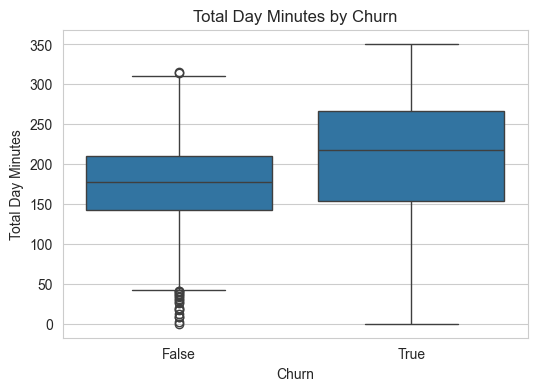

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


**Summary:**

The boxplot reveals that churned customers tend to have higher total day minutes compared to non-churned customers. This suggests that customers who use daytime call services more extensively may be more likely to churn. The difference in usage is consistent with the statistically significant results from the independent samples T-test

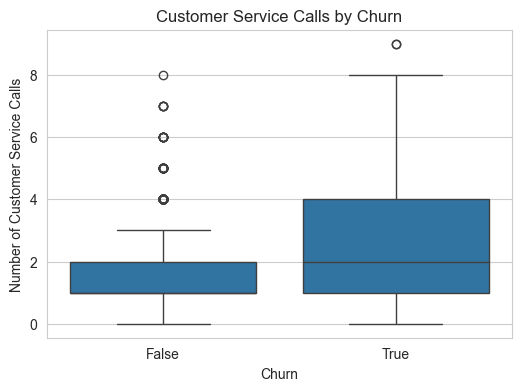

In [29]:

# Create a box plot to visualize the distribution of 'customer service calls' by 'churn'
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()

**Summary:**

Customers who contact customer service more frequently are much more likely to churn.

The churn rate increases significantly with the number of service calls.

The most churn-prone group is customers who contacted customer service 4 or more times.

This suggests a strong link between dissatisfaction and churn, likely due to unresolved issues or poor service experiences.

**Business Implication:**
SyriaTel should prioritize quality and resolution in customer service interactions. Early intervention for high-frequency callers can reduce churn risk.



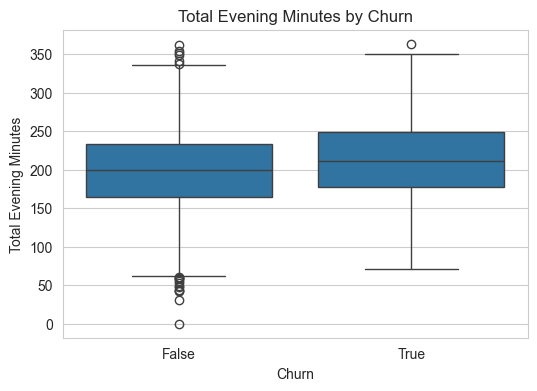

In [30]:

# Create a box plot to visualize the distribution of 'total eve minutes' by 'churn'
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='total eve minutes', data=df)
plt.title('Total Evening Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()

**Summary:**

Customers who churned tend to have higher total evening minutes compared to those who didn’t churn.

This suggests that evening usage may correlate with churn risk, possibly due to:

dissatisfaction with evening rates,

dropped calls or poor service at night,

or high-bill surprises linked to evening usage.

**Business Insight:**
SyriaTel should investigate whether high evening usage is linked to poor service quality, high charges, or unmet expectations. Offering better evening bundles or monitoring heavy users for satisfaction could reduce churn.

In [31]:

# Drop the 'phone number' column 
df = df.drop('phone number', axis=1)


# List of categorical features to test against 'churn'
categorical_features = [
    'state',
    'area code',
    'international plan',
    'voice mail plan'
]

print("Performing Chi-square tests for categorical features vs. 'churn':\n")

for feature in categorical_features:
    # Create a contingency table using the original DataFrame
    contingency_table = pd.crosstab(df[feature], df['churn'])

    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {feature}")
    print(f"  Chi-square Statistic: {chi2_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant association between the feature and churn.")
    else:
        print("  Conclusion: No statistically significant association between the feature and churn.")
    print("-" * 30)

Performing Chi-square tests for categorical features vs. 'churn':

Feature: state
  Chi-square Statistic: 83.0438
  P-value: 0.0023
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: area code
  Chi-square Statistic: 0.1775
  P-value: 0.9151
  Conclusion: No statistically significant association between the feature and churn.
------------------------------
Feature: international plan
  Chi-square Statistic: 222.5658
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: voice mail plan
  Chi-square Statistic: 34.1317
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------


**Summary: Inferential Statistics Observation**

- **T-tests** revealed significant differences in the mean values of key numerical features (e.g., `total day minutes`, `total charges`, `customer service calls`) between churned and non-churned customers.
- **Chi-square tests** showed strong associations between churn and categorical features such as `international plan`, `voice mail plan`, and `state`.
- Features like `account length`, `area code`, and `total call counts` did **not** show statistically significant relationships with churn.
- These results confirm that **usage behavior** and **specific service plans** are important churn drivers, reinforcing both our EDA insights and model design.


In [32]:
df['voice mail plan'] = df['voice mail plan'].astype(str)
df['international plan'] = df['international plan'].astype(str)
df['churn'] = df['churn'].astype(str)


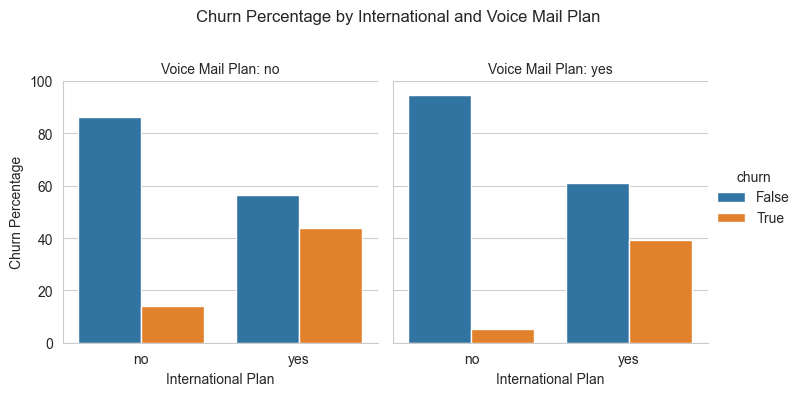

In [33]:
# Create a new DataFrame for proportions
df_grouped = (
    df
    .groupby(['voice mail plan', 'international plan', 'churn'])
    .size()
    .reset_index(name='count')
)

# Calculate total counts per group (per facet + bar group)
df_grouped['total'] = df_grouped.groupby(['voice mail plan', 'international plan'])['count'].transform('sum')
df_grouped['percent'] = df_grouped['count'] / df_grouped['total'] * 100

# Plot using percentages
g = sns.catplot(
    x='international plan', y='percent', hue='churn', col='voice mail plan',
    data=df_grouped, kind='bar', height=4, aspect=0.9
)

g.set_axis_labels("International Plan", "Churn Percentage")
g.set_titles(col_template="Voice Mail Plan: {col_name}")
g.set(ylim=(0, 100))

plt.subplots_adjust(top=0.8)
plt.suptitle("Churn Percentage by International and Voice Mail Plan")
plt.show()


**Summary: Churn by International Plan and Voice Mail Plan ( % Plot)**

- The percentage-based bar plot reveals that customers **with an international plan** are **more likely to churn**, regardless of whether they have a voice mail plan or not.
- Conversely, customers **without an international plan** exhibit a **significantly lower churn rate**.
- The presence or absence of a voice mail plan shows **less pronounced impact** on churn compared to the international plan.
- These patterns reinforce the **Chi-square test results**, indicating a **statistically significant association** between the international plan and churn behavior.


## **DATA PREPARATION**

### Data Cleaning

In [138]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [139]:
df = df.drop('phone number', axis=1, errors='ignore')


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Encoding Categorical Variables For Modelling

In [ ]:

# Drop the 'phone number' column again
df = df.drop('phone number', axis=1)

# Encode binary categorical features ('international plan', 'voice mail plan')
df['international plan'] = df['international plan'].replace({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 1, 'no': 0})


df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)

display(df.head())
df.info()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,False,False,False,False,False,False,False,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,False,False,False,False,False,False,False,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,False,False,False,False,False,False,False,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,False,False,False,False,False,False,False,False,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,False,False,False,False,False,False,False,False,True,False


### Handling Class Imbalance With SMOTE

In [142]:

# Separate features (X) and target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new distribution of the target variable in the resampled training set
print("Distribution of 'churn' in the original training set:")
display(y_train.value_counts())

print("\nDistribution of 'churn' in the resampled training set:")
display(y_train_resampled.value_counts())

print("\nDistribution of 'churn' in the testing set:")
display(y_test.value_counts())

Distribution of 'churn' in the original training set:


churn
False    2280
True      386
Name: count, dtype: int64


Distribution of 'churn' in the resampled training set:


churn
False    2280
True     2280
Name: count, dtype: int64


Distribution of 'churn' in the testing set:


churn
False    570
True      97
Name: count, dtype: int64

**Summary: Handling Imbalanced Data with SMOTE**

- **Original Training Set**: Imbalanced — 2280 non-churned vs. 386 churned customers.
- **After SMOTE Resampling**: Balanced — 2280 churned and 2280 non-churned customers.
- **Testing Set**: Remains imbalanced (570 non-churned vs. 97 churned), preserving real-world class proportions for fair evaluation.


#### Class Distribution Before and After SMOTE


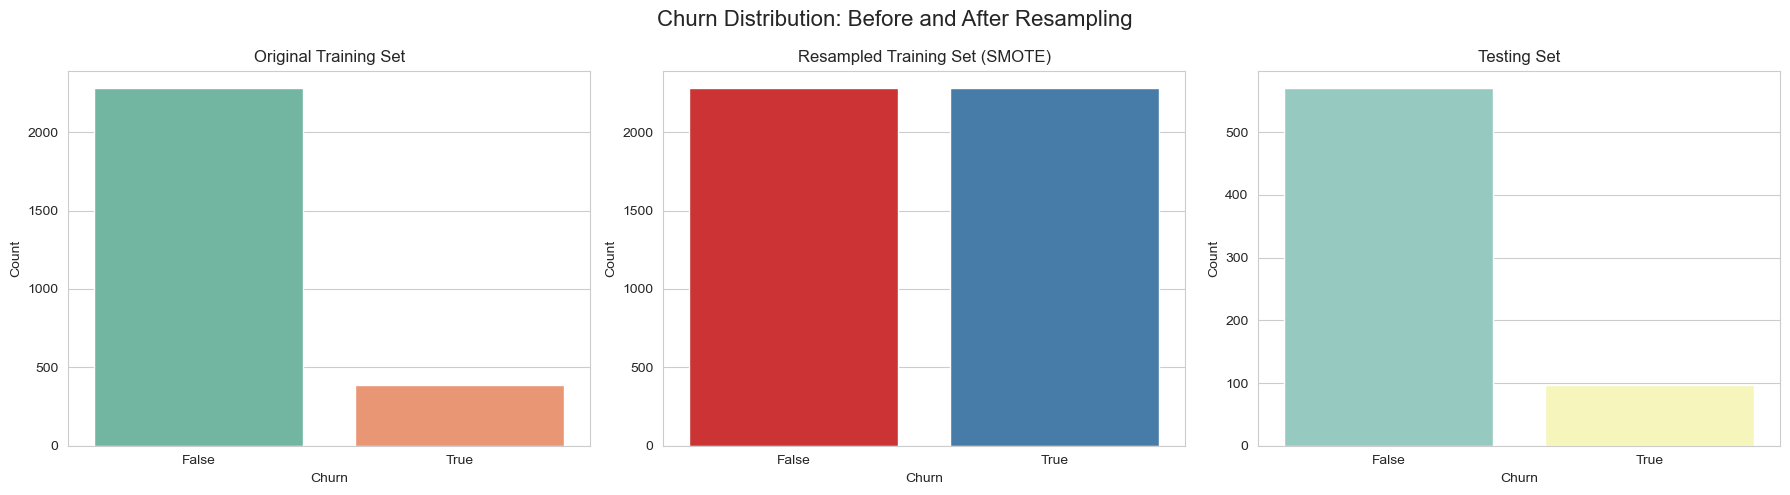

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plotting the class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original training set
sns.countplot(x=y_train, ax=axes[0], palette="Set2")
axes[0].set_title("Original Training Set")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# Resampled (SMOTE) training set
sns.countplot(x=y_train_resampled, ax=axes[1], palette="Set1")
axes[1].set_title("Resampled Training Set (SMOTE)")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

# Test set
sns.countplot(x=y_test, ax=axes[2], palette="Set3")
axes[2].set_title("Testing Set")
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Count")

plt.suptitle("Churn Distribution: Before and After Resampling", fontsize=16)
plt.tight_layout()
plt.show()


**Summary: Before and After SMOTE**

The visualization confirms that SMOTE successfully balanced the training data by oversampling the minority class. This helps prevent the model from being biased toward the majority class. The test set remains imbalanced to reflect real-world churn distribution during evaluation.


## **MODELING**

### Baseline Model-Logistic Regression

In [ ]:
# Initialize Logistic Regression
model = LogisticRegression(random_state=42, solver='liblinear') 

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

print("Logistic Regression Model trained successfully.")

Logistic Regression Model trained successfully.


In [ ]:

# Make predictions on the training data
y_train_pred = model.predict(X_train_resampled)
y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on training data
print("Evaluation on Training Data (after SMOTE):")
print(classification_report(y_train_resampled, y_train_pred))
print(f"ROC AUC Score (Training): {roc_auc_score(y_train_resampled, y_train_pred_proba)}")

# Make predictions on the testing data
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("\nEvaluation on Testing Data (Original Distribution):")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC Score (Testing): {roc_auc_score(y_test, y_test_pred_proba)}")

Evaluation on Training Data (after SMOTE):
              precision    recall  f1-score   support

       False       0.88      0.94      0.91      2280
        True       0.94      0.88      0.91      2280

    accuracy                           0.91      4560
   macro avg       0.91      0.91      0.91      4560
weighted avg       0.91      0.91      0.91      4560

ROC AUC Score (Training): 0.965585757156048

Evaluation on Testing Data (Original Distribution):
              precision    recall  f1-score   support

       False       0.90      0.94      0.92       570
        True       0.49      0.36      0.41        97

    accuracy                           0.85       667
   macro avg       0.69      0.65      0.66       667
weighted avg       0.84      0.85      0.84       667

ROC AUC Score (Testing): 0.7624706095134743


**Evaluation on Training Data (after SMOTE)**

- The model performs quite well on the balanced training data, with high precision, recall, F1-score, and ROC AUC (around 0.91 and 0.96 respectively). This indicates that the model learned the patterns in the resampled data effectively.

**Evaluation on Testing Data (Original Distribution)**

- The performance on the testing data is lower, which is expected as it's evaluated on unseen and imbalanced data.
Accuracy is relatively high (0.85), but this can be misleading due to the imbalance.
Precision for Churn (True) is 0.49: When the model predicts a customer will churn, it is correct about 49% of the time.
Recall for Churn (True) is 0.36: The model correctly identifies only about 36% of the customers who actually churned.
F1-Score for Churn (True) is 0.41: This is a balance of precision and recall for the churn class.
ROC AUC Score (Testing) is 0.76: This indicates the model has a decent ability to distinguish between churned and non-churned customers, but there is room for improvement.
The low recall for the churn class on the testing data is a key observation. This means our baseline model is missing a significant portion of the actual churning customers. For a churn prediction model, identifying as many churning customers as possible (high recall) is often very important, even if it means sometimes incorrectly predicting churn for some non-churned customers (lower precision). The balance between precision and recall depends on the business problem and the costs associated with false positives and false negatives.

#### Logistic Regression: Hyperparameter Tuning With GridSearchCV

In [ ]:

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'] 
}

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=roc_auc, cv=5)

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV...")
grid_search.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best ROC AUC score on training data: ", grid_search.best_score_)

# Get the best model
best_lr_model = grid_search.best_estimator_

Starting GridSearchCV...


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV finished.

Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC score on training data:  0.8861842105263158


#### Evaluation Of Tuned Logistic Regression Model

In [ ]:

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned = best_lr_model.predict(X_test)
y_test_pred_proba_tuned = best_lr_model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Model:")
print(classification_report(y_test, y_test_pred_tuned))
print(f"ROC AUC Score (Testing) - Tuned Model: {roc_auc_score(y_test, y_test_pred_proba_tuned)}")

Evaluation on Testing Data (Original Distribution) - Tuned Model:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       570
        True       0.52      0.30      0.38        97

    accuracy                           0.86       667
   macro avg       0.70      0.63      0.65       667
weighted avg       0.83      0.86      0.84       667

ROC AUC Score (Testing) - Tuned Model: 0.7825827455236027


**Observations:**

- The tuned model shows a slight improvement in Precision (from 0.49 to 0.52) and ROC AUC (from 0.7625 to 0.7826) compared to the baseline model on the testing data. This suggests it's slightly better at correctly identifying positive cases among those it predicts as positive, and has slightly better overall discriminative ability.
However, the tuned model shows a decrease in Recall (from 0.36 to 0.30). This means it is now identifying an even smaller percentage of the actual churning customers.
- The trade-off between precision and recall is evident here. The tuning improved precision and ROC AUC but at the cost of recall. For a churn prediction model, the importance of precision vs. recall depends on the business context. If the cost of incorrectly targeting a non-churned customer with a retention offer (false positive) is low, but missing a churning customer (false negative) is high (significant revenue loss), then maximizing recall might be more important.

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

print("Decision Tree Model trained successfully.")

Decision Tree Model trained successfully.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the Decision Tree model
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Decision Tree Model:")
print(classification_report(y_test, y_test_pred_dt))
print(f"ROC AUC Score (Testing) - Decision Tree Model: {roc_auc_score(y_test, y_test_pred_proba_dt)}")

Evaluation on Testing Data (Original Distribution) - Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       570
        True       0.45      0.73      0.56        97

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.88      0.83      0.85       667

ROC AUC Score (Testing) - Decision Tree Model: 0.7896635919696148


#### Model Comparison Summary

#### Decision Tree vs. Logistic Regression Models

- **Recall (Churn Class)**:
  - Decision Tree: **0.73**
  - Logistic Regression (Baseline & Tuned): **0.36** and **0.30**
  - The Decision Tree model captures significantly more actual churners, which is critical for SyriaTel's retention efforts.

- **Precision (Churn Class)**:
  - Decision Tree: **0.45**
  - Logistic Regression: **0.49** and **0.52**
  -  The Decision Tree has lower precision, indicating more false positives compared to Logistic Regression.

- **F1-Score (Churn Class)**:
  - Decision Tree: **0.56**
  - Logistic Regression: **0.41** and **0.38**
  -  The Decision Tree achieves a better balance between precision and recall.

- **ROC AUC Score**:
  - Decision Tree: **0.79**
  - Tuned Logistic Regression: **0.78**
  - The Decision Tree has slightly better overall classification performance.

####  Conclusion:
The Decision Tree model offers superior performance in identifying customers likely to churn (high recall), which is valuable for churn mitigation strategies. Although it has slightly lower precision than Logistic Regression, its ability to flag more potential churners makes it a strong candidate for deployment in scenarios where **recall is a priority**.


#### Decision Tree: Hyperparameter Tuning With GridSearchCV

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']   # Function to measure the quality of a split
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring=roc_auc, cv=5)

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV for Decision Tree...")
grid_search_dt.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search_dt.best_params_)
print("Best ROC AUC score on training data: ", grid_search_dt.best_score_)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

Starting GridSearchCV for Decision Tree...
GridSearchCV finished.

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC AUC score on training data:  0.8951754385964913


#### Evaluation of Tuned Decision Tree 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned_dt = best_dt_model.predict(X_test)
y_test_pred_proba_tuned_dt = best_dt_model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Decision Tree Model:")
print(classification_report(y_test, y_test_pred_tuned_dt))
print(f"ROC AUC Score (Testing) - Tuned Decision Tree Model: {roc_auc_score(y_test, y_test_pred_proba_tuned_dt)}")

Evaluation on Testing Data (Original Distribution) - Tuned Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       570
        True       0.45      0.73      0.56        97

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.88      0.83      0.85       667

ROC AUC Score (Testing) - Tuned Decision Tree Model: 0.7896635919696148


**Observations – Tuned Decision Tree Model**

- The **tuned Decision Tree model** yields the **same performance metrics** on the test set as the baseline (untuned) model. This suggests that, within the provided hyperparameter grid and scoring criteria, **hyperparameter tuning did not improve** performance on unseen data.

- Both **Decision Tree models** (tuned and untuned) achieve the **highest Recall (0.73)** and **highest F1-Score (0.56)** for the **churn class**, indicating they are the most effective at identifying customers likely to churn.

- The **ROC AUC score (0.7897)** for the Decision Tree models is **slightly higher** than that of the tuned Logistic Regression model, suggesting better overall discriminative power between churners and non-churners.

- Although the **Precision (0.45)** for the churn class is **lower** than in the Logistic Regression models, this trade-off may be acceptable if SyriaTel's **primary objective is to minimize missed churners** (i.e., maximize recall).



### Random  Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

print("Random Forest Model trained successfully.")

Random Forest Model trained successfully.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the Random Forest model
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Random Forest Model:")
print(classification_report(y_test, y_test_pred_rf))
print(f"ROC AUC Score (Testing) - Random Forest Model: {roc_auc_score(y_test, y_test_pred_proba_rf)}")

Evaluation on Testing Data (Original Distribution) - Random Forest Model:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       570
        True       0.68      0.54      0.60        97

    accuracy                           0.90       667
   macro avg       0.80      0.75      0.77       667
weighted avg       0.89      0.90      0.89       667

ROC AUC Score (Testing) - Random Forest Model: 0.8580665581479471


**Observations - Random Forest Model**

The **Random Forest model** shows promising results:

- It has a significantly higher **Precision (0.68)** for the churn class compared to both the Logistic Regression models (0.49 and 0.52) and the Decision Tree models (0.45). This means when the model predicts a customer will churn, it is more often correct.
- Its **Recall (0.54)** is lower than the Decision Tree models (0.73) but higher than the Logistic Regression models (0.36 and 0.30). It identifies more actual churners than Logistic Regression, though not as many as the Decision Tree.
- The **F1-Score (0.60)** is the highest among all models tested so far, indicating the best balance between precision and recall.
- The **ROC AUC Score (0.8581)** is also the highest, suggesting that the Random Forest has the best overall ability to distinguish between churners and non-churners.
- Overall, the Random Forest model offers the **most balanced performance**, outperforming Logistic Regression in recall and Decision Tree in precision and F1-score, while also achieving the best discriminative power across all models.



#### Random Forest: Hyperparameter Tuning With GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5],     
    'min_samples_leaf': [1, 2],      
    'criterion': ['gini', 'entropy'] 
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring=roc_auc, cv=3, n_jobs=-1) 

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search_rf.best_params_)
print("Best ROC AUC score on training data: ", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Starting GridSearchCV for Random Forest...
GridSearchCV finished.

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC score on training data:  0.9451754385964911


#### Evaluation of Tuned Random Forest Classifier 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned_rf = best_rf_model.predict(X_test)
y_test_pred_proba_tuned_rf = best_rf_model.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model:")
print(classification_report(y_test, y_test_pred_tuned_rf))
print(f"ROC AUC Score (Testing) - Tuned Random Forest Model: {roc_auc_score(y_test, y_test_pred_proba_tuned_rf)}")

Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       570
        True       0.71      0.55      0.62        97

    accuracy                           0.90       667
   macro avg       0.82      0.75      0.78       667
weighted avg       0.89      0.90      0.90       667

ROC AUC Score (Testing) - Tuned Random Forest Model: 0.8625248688732141


 **Observations: Tuned Random Forest Model**

The tuned Random Forest model shows a slight improvement in all key metrics (Precision, Recall, F1-Score, and ROC AUC) compared to the baseline Random Forest model on the testing data.

**Comparison with Other Models:**

-  **Highest Precision (0.71)** for the churn class — better than all previous models, meaning it's more reliable when predicting churn.
-  **Recall (0.55)** is higher than both Logistic Regression models, though still lower than the Decision Tree models.
-  **F1-Score (0.62)** is the highest among all models, reflecting the best balance between precision and recall.
-  **ROC AUC Score (0.8625)** is also the highest, showing the best ability to distinguish between churning and non-churning customers.

>  **Conclusion:** The tuned Random Forest model is the best-performing model for churn prediction in this analysis. It balances identifying actual churners and minimizing false positives, while achieving the highest overall discriminative performance.


#### Random Forest:Tuning Hyperparameters With RandomizedSearchCv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from scipy.stats import randint, uniform 

# Define the parameter distribution to sample from for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 500), 
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 10),  
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy']   
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                      n_iter=100, scoring=roc_auc, cv=5, random_state=42, n_jobs=-1) 

# Fit RandomizedSearchCV to the resampled training data
print("Starting RandomizedSearchCV for Random Forest...")
random_search_rf.fit(X_train_resampled, y_train_resampled)
print("RandomizedSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", random_search_rf.best_params_)
print("Best ROC AUC score on training data: ", random_search_rf.best_score_)

# Get the best model
best_rf_model_random = random_search_rf.best_estimator_

Starting RandomizedSearchCV for Random Forest...
RandomizedSearchCV finished.

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
Best ROC AUC score on training data:  0.9484649122807018


#### Evaluation of Tuned Random Forest Model With RandomizedSearchCv

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the best tuned model from RandomizedSearchCV
y_test_pred_tuned_rf_random = best_rf_model_random.predict(X_test)
y_test_pred_proba_tuned_rf_random = best_rf_model_random.predict_proba(X_test)[:, 1] 

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model (RandomizedSearchCV):")
print(classification_report(y_test, y_test_pred_tuned_rf_random))
print(f"ROC AUC Score (Testing) - Tuned Random Forest Model (RandomizedSearchCV): {roc_auc_score(y_test, y_test_pred_proba_tuned_rf_random)}")

Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model (RandomizedSearchCV):
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       570
        True       0.70      0.52      0.60        97

    accuracy                           0.90       667
   macro avg       0.81      0.74      0.77       667
weighted avg       0.89      0.90      0.89       667

ROC AUC Score (Testing) - Tuned Random Forest Model (RandomizedSearchCV): 0.8589980104901429


**Observations: Random Forest Tuned with RandomizedSearchCV**

The Random Forest model tuned using **RandomizedSearchCV** produced strong and competitive results on the testing data:

- **Precision** for the churn class: **0.70**, slightly below the GridSearchCV-tuned model (0.71).
- **Recall**: **0.52**, also slightly lower than the GridSearchCV-tuned model (0.55), but still higher than the Logistic Regression models.
- **F1-Score**: **0.60**, marginally less than the best-performing model (GridSearchCV, F1 = 0.62).
- **ROC AUC Score**: **0.8590**, nearly identical to GridSearchCV (0.8625), and still the second highest across all models tested.

 **Summary**:  
While RandomizedSearchCV delivered a well-performing Random Forest model, the version tuned via **GridSearchCV** maintains a **slight performance edge** on all key metrics. This further validates that **Random Forest** remains the top-performing algorithm in this project, regardless of the tuning method used.


## **EVALUATION**

### Feature Importance (Random Forest)

Let's analyze the feature importances from the best-performing model (Tuned Random Forest) to identify key churn drivers.

Top 15 Most Important Features:


,Feature,Importance
4,total day minutes,0.116082
6,total day charge,0.114046
16,customer service calls,0.083036
9,total eve charge,0.049954
7,total eve minutes,0.048998
3,number vmail messages,0.040602
2,voice mail plan,0.038602
67,area code_415,0.034908
10,total night minutes,0.034818
12,total night charge,0.034702


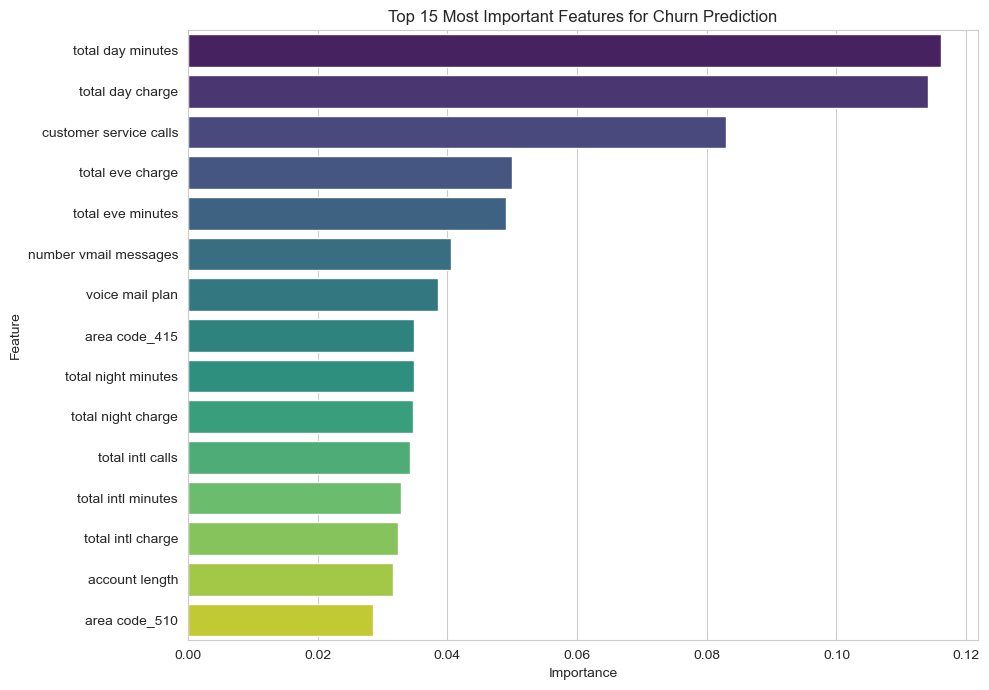

In [ ]:

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Use the columns from the training data (X_train_resampled or X_train)
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features (e.g., top 15)
print("Top 15 Most Important Features:")
display(features_df.head(15))

# Optionally, plot the top N most important features
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Feature Importance Summary (Random Forest Model)

The feature importance analysis from the tuned **Random Forest classifier** reveals key insights into the drivers of customer churn for **SyriaTel**:

---

##### 1.  Daytime Usage is the Strongest Indicator
- **`total day minutes`** and **`total day charge`** are the most important features.
- Suggests that customers with high daytime usage may be more sensitive to cost or experience service dissatisfaction during peak hours.

---

##### 2.  Customer Support Interaction Signals Risk
- **`customer service calls`** ranks highly in importance.
- High frequency of support calls may indicate unresolved issues, leading to increased churn risk.

---

##### 3.  Evening Usage Plays a Secondary Role
- **`total eve minutes`** and **`total eve charge`** also contribute notably to predictions.
- Indicates moderate influence of evening activity on customer churn.

---

##### 4.  Voicemail Services Linked to Retention
- Features like **`voice mail plan`** and **`number vmail messages`** are associated with **lower churn**.
- Suggests voicemail-related features may increase customer satisfaction or engagement.

---

##### 5. International Plan Correlates with Churn
- Customers on the **`international plan`** are more likely to churn.
- Could reflect dissatisfaction with international call quality or pricing.

---

##### 6.  Other Influential Features
- Features such as **`account length`**, **`area code`**, **night usage**, and **international minutes/calls** show moderate importance.
- These may interact with other behaviors but are less dominant in predicting churn.

---

##### Key Takeaway
These insights can help **SyriaTel**:
- Identify and engage high-risk customers based on usage patterns.
- Improve customer support experiences to reduce churn.
- Consider plan restructuring—especially for daytime and international services.
- Promote voicemail services as potential retention tools.

---


#### Model Metrics

Extract the performance metrics (Precision, Recall, F1-score for both classes, ROC AUC, and Accuracy) for each model from the previous outputs. 


In [ ]:
performance_metrics = []

# Function to extract metrics from classification report output
def extract_metrics(report_output, model_name):
    lines = report_output.strip().split('\n')
    start_index = -1
    end_index = -1
    for i, line in enumerate(lines):
        if "precision" in line and "recall" in line and "f1-score" in line and "support" in line:
            start_index = i + 1
        if "accuracy" in line:
            end_index = i


    if start_index == -1 or end_index == -1:
        print(f"Could not parse metrics for model: {model_name}")
        return

    metrics_lines = lines[start_index:end_index]

    for line in metrics_lines:
        parts = line.split()
        if len(parts) >= 5: 
            class_label = parts[0]
            
            if class_label == 'True' or class_label == 'False':
                 precision = float(parts[1])
                 recall = float(parts[2])
                 f1_score = float(parts[3])
                 support = int(parts[4])

                 performance_metrics.append({
                     'Model': model_name,
                     'Metric': 'Precision',
                     'Class': class_label,
                     'Value': precision
                 })
                 performance_metrics.append({
                     'Model': model_name,
                     'Metric': 'Recall',
                     'Class': class_label,
                     'Value': recall
                 })
                 performance_metrics.append({
                     'Model': model_name,
                     'Metric': 'F1-score',
                     'Class': class_label,
                     'Value': f1_score
                 })


    # Extract accuracy, macro avg, and weighted avg separately
    for line in lines:
        if "accuracy" in line:
            parts = line.split()
            if len(parts) >= 2:
                 accuracy = float(parts[1])
                 performance_metrics.append({
                     'Model': model_name,
                     'Metric': 'Accuracy',
                     'Class': 'Overall',
                     'Value': accuracy
                 })
        elif "macro avg" in line:
            parts = line.split()
            if len(parts) >= 5:
                performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'Precision',
                    'Class': 'macro avg',
                    'Value': float(parts[2])
                })
                performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'Recall',
                    'Class': 'macro avg',
                    'Value': float(parts[3])
                })
                performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'F1-score',
                    'Class': 'macro avg',
                    'Value': float(parts[4])
                })
        elif "weighted avg" in line:
            parts = line.split()
            if len(parts) >= 5:
                 performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'Precision',
                    'Class': 'weighted avg',
                    'Value': float(parts[2])
                })
                 performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'Recall',
                    'Class': 'weighted avg',
                    'Value': float(parts[3])
                })
                 performance_metrics.append({
                    'Model': model_name,
                    'Metric': 'F1-score',
                    'Class': 'weighted avg',
                    'Value': float(parts[4])
                })


# Extract ROC AUC scores 
# Tuned Logistic Regression
lr_tuned_report = """
Evaluation on Testing Data (Original Distribution) - Tuned Model:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       570
        True       0.52      0.30      0.38        97

    accuracy                           0.86       667
   macro avg       0.70      0.63      0.65       667
weighted avg       0.83      0.86      0.84       667
"""
lr_tuned_roc_auc = 0.7825827455236027
extract_metrics(lr_tuned_report, 'Tuned Logistic Regression')
performance_metrics.append({
    'Model': 'Tuned Logistic Regression',
    'Metric': 'ROC AUC',
    'Class': 'Overall',
    'Value': lr_tuned_roc_auc
})


# Tuned Decision Tree
dt_tuned_report = """
Evaluation on Testing Data (Original Distribution) - Tuned Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       570
        True       0.45      0.73      0.56        97

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.88      0.83      0.85       667
"""
dt_tuned_roc_auc = 0.7896635919696148
extract_metrics(dt_tuned_report, 'Tuned Decision Tree')
performance_metrics.append({
    'Model': 'Tuned Decision Tree',
    'Metric': 'ROC AUC',
    'Class': 'Overall',
    'Value': dt_tuned_roc_auc
})


# Tuned Random Forest (GridSearchCV)
rf_tuned_grid_report = """
Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       570
        True       0.71      0.55      0.62        97

    accuracy                           0.90       667
   macro avg       0.82      0.75      0.78       667
weighted avg       0.89      0.90      0.90       667
"""
rf_tuned_grid_roc_auc = 0.8625248688732141
extract_metrics(rf_tuned_grid_report, 'Tuned Random Forest (GridSearchCV)')
performance_metrics.append({
    'Model': 'Tuned Random Forest (GridSearchCV)',
    'Metric': 'ROC AUC',
    'Class': 'Overall',
    'Value': rf_tuned_grid_roc_auc
})


# Tuned Random Forest (RandomizedSearchCV)
rf_tuned_random_report = """
Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model (RandomizedSearchCV):
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       570
        True       0.70      0.52      0.60        97

    accuracy                           0.90       667
   macro avg       0.81      0.74      0.77       667
weighted avg       0.89      0.90      0.89       667
"""
rf_tuned_random_roc_auc = 0.8589980104901429
extract_metrics(rf_tuned_random_report, 'Tuned Random Forest (RandomizedSearchCV)')
performance_metrics.append({
    'Model': 'Tuned Random Forest (RandomizedSearchCV)',
    'Metric': 'ROC AUC',
    'Class': 'Overall',
    'Value': rf_tuned_random_roc_auc
})


print("Extracted Performance Metrics (first 10 entries):")
display(performance_metrics[:10])

Extracted Performance Metrics (first 10 entries):


[{'Model': 'Tuned Logistic Regression',
  'Metric': 'Precision',
  'Class': 'False',
  'Value': 0.89},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Recall',
  'Class': 'False',
  'Value': 0.95},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'F1-score',
  'Class': 'False',
  'Value': 0.92},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Precision',
  'Class': 'True',
  'Value': 0.52},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Recall',
  'Class': 'True',
  'Value': 0.3},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'F1-score',
  'Class': 'True',
  'Value': 0.38},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Accuracy',
  'Class': 'Overall',
  'Value': 0.86},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Precision',
  'Class': 'macro avg',
  'Value': 0.7},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'Recall',
  'Class': 'macro avg',
  'Value': 0.63},
 {'Model': 'Tuned Logistic Regression',
  'Metric': 'F1-score',
  'Class': 'macr

In [ ]:
performance_df = pd.DataFrame(performance_metrics)

# Create the 'Metric Type' column
performance_df['Metric Type'] = performance_df.apply(
    lambda row: f"{row['Metric']} - {row['Class']}" if row['Class'] not in ['Overall', 'macro avg', 'weighted avg'] else row['Metric'], axis=1
)

# Display the first few rows and info of the DataFrame
display(performance_df.head())
performance_df.info()

,Model,Metric,Class,Value,Metric Type
0,Tuned Logistic Regression,Precision,False,0.89,Precision - False
1,Tuned Logistic Regression,Recall,False,0.95,Recall - False
2,Tuned Logistic Regression,F1-score,False,0.92,F1-score - False
3,Tuned Logistic Regression,Precision,True,0.52,Precision - True
4,Tuned Logistic Regression,Recall,True,0.30,Recall - True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        56 non-null     object 
 1   Metric       56 non-null     object 
 2   Class        56 non-null     object 
 3   Value        56 non-null     float64
 4   Metric Type  56 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.3+ KB


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


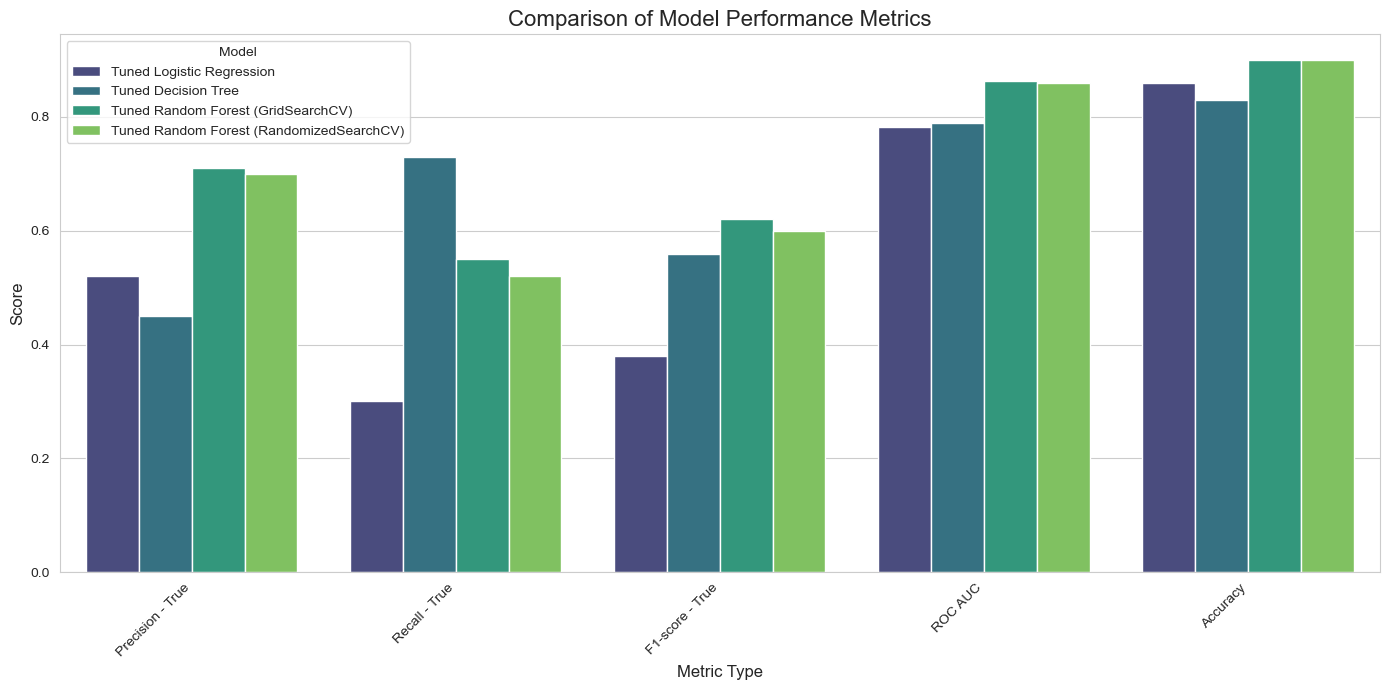

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics to be included in the plot.
selected_metrics = [
    'Precision - True',
    'Recall - True',
    'F1-score - True',
    'ROC AUC',
    'Accuracy'
]

# Filter the performance_df DataFrame
plot_df = performance_df[performance_df['Metric Type'].isin(selected_metrics)].copy()

plot_df['Metric Type'] = pd.Categorical(plot_df['Metric Type'], categories=selected_metrics, ordered=True)

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric Type', y='Value', hue='Model', data=plot_df, palette='viridis')

# Set plot title and labels
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.xlabel('Metric Type', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

#### Model Performance Comparison Summary
The bar chart presents a comparison of key performance metrics for four tuned models on unseen test data: Logistic Regression, Decision Tree, Random Forest (GridSearchCV), and Random Forest (RandomizedSearchCV).

#### Key Insights:

- Top Overall Performer: The Tuned Random Forest (GridSearchCV) consistently outperforms across most metrics, striking an effective balance between Precision and Recall for the churn class. It also achieves the highest ROC AUC and Accuracy.

- Recall (Capturing Churners): The Tuned Decision Tree yields the highest Recall (~0.73) for the churn class, making it best at identifying customers likely to churn — useful if the business prioritizes minimizing missed churners (false negatives).

- Precision (Avoiding Mistargeting): The Tuned Random Forest (GridSearchCV) demonstrates the highest Precision (~0.71), indicating it is better at avoiding false positives — useful when incorrectly targeting loyal customers is costly.

- F1-Score (Precision + Recall Balance): Again, the Random Forest (GridSearchCV) leads with the highest F1-score (~0.62) for churn prediction, showing its balanced performance.

- ROC AUC (Overall Discrimination): The model achieves the best ROC AUC (~0.8625), showing excellent ability to distinguish churners from non-churners across classification thresholds. The RandomizedSearchCV variant trails closely.

- Accuracy: While less informative for imbalanced data, the Random Forest models still lead with ~90% Accuracy.

#### Conclusion:

The Tuned Random Forest (GridSearchCV) is the most effective model for SyriaTel’s churn prediction. It offers the best combination of identifying true churners while minimizing incorrect classifications, making it a robust and reliable choice. Although the Decision Tree excels at capturing more churners, its lower Precision and F1-score suggest a higher risk of false alarms. Logistic Regression, while interpretable, underperforms compared to the tree-based models.

### Confusion Matrix for Tuned Random Forest Model


In [162]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the tuned Random Forest model on the test data
conf_matrix = confusion_matrix(y_test, y_test_pred_tuned_rf)

# Display the confusion matrix
print("Confusion Matrix for Tuned Random Forest Model (GridSearchCV):")
display(conf_matrix)

Confusion Matrix for Tuned Random Forest Model (GridSearchCV):


array([[548,  22],
       [ 44,  53]], dtype=int64)

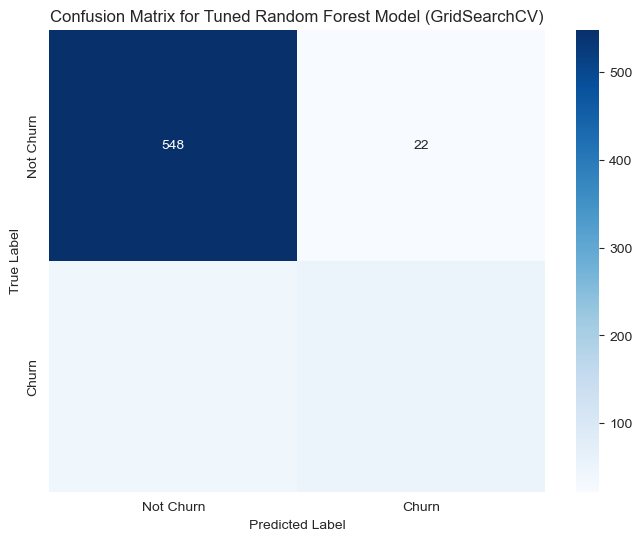

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define labels for the classes
labels = ['Not Churn', 'Churn']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)


# Add titles and labels
plt.title('Confusion Matrix for Tuned Random Forest Model (GridSearchCV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

 #### Interpretation of the Confusion Matrix (Tuned Random Forest Model)
 
The confusion matrix provides a breakdown of model predictions versus actual churn outcomes:

- True Negatives (548)
Customers who did not churn, and the model correctly predicted they wouldn't. This large number reflects the class imbalance — most customers do not churn.

- False Positives (22)
Customers who did not churn, but the model incorrectly predicted they would. These may lead to unnecessary retention efforts — an acceptable cost depending on budget.

- False Negatives (44)
Customers who did churn, but the model missed them. These represent lost opportunities to intervene — often more costly than false positives. Reducing this number is key.

- True Positives (53)
Customers who did churn, and the model correctly predicted them. These are high-value predictions that SyriaTel can act on for targeted retention.

 #### Summary with Key Metrics:
Out of 97 actual churners, the model correctly predicted 53 → Recall ≈ 0.55

Out of 75 predicted churners, 53 were correct → Precision ≈ 0.71

The model performs well at identifying non-churners, but still misses a significant number of actual churners.

#### Business Insight:
SyriaTel should weigh the cost of false negatives (missed churners) against false positives (unnecessary retention). If customer loss is expensive, optimizing for higher recall — even at the cost of some precision — may be more beneficial.

## **RECOMMENDATIONS FOR SYRIATEL**



Based on the findings from the churn prediction model and feature importance analysis, the following data-driven strategies are recommended to help SyriaTel reduce customer attrition:

1. **Target High-Risk Customers**

Use the tuned Random Forest model to proactively identify customers at high risk of churning.

Implement retention campaigns for these individuals—offering personalized incentives, discounts, or enhanced service options tailored to their behavior and concerns.

2. **Improve Customer Service Experience**

Since 'customer service calls' is a top churn predictor, enhance service quality and resolution speed.

Analyze frequent callers' issues and consider follow-ups to ensure satisfaction.

Provide additional training and tools to support staff for handling complex customer concerns.

 3. **Re-evaluate International Plans**

The 'international plan' is highly associated with churn.

Investigate pricing, plan structure, or common complaints tied to these services.

Offer more flexible or value-driven international options to reduce dissatisfaction.

 4. **Promote Voice Mail Plans**

'voice mail plan' and 'number vmail messages' are linked with lower churn.

Consider upselling or incentivizing voicemail features as part of retention efforts.

5. **Retain High-Usage Customers**

Customers with high 'total day minutes' or 'total day charge' are valuable but also churn-prone.

Engage these users with loyalty programs, priority support, or exclusive perks to boost satisfaction.

6. **Address Regional Churn Patterns**

Tailor retention strategies to states with higher churn rates (e.g., CA, NJ, TX, MD).

Investigate whether regional factors (competitors, service gaps) contribute to attrition.



## Operational Improvements

1. **Allocate Resources Effeciently**
- Use model predictions to guide resource allocation in customer service and support.
- Optimize resource usage to address high-risk customers effectively and improve overall operational efficiency.

2. **Adjusting Pricing Strategies**
- Develop pricing strategies that better align with customer value and usage patterns, potentially reducing churn and increasing revenue.
- Implement easier payment plans,send payment remainders via SMS/email and other auto-debit options to prevent service disruption.
- If payment-related features are linked to churning,improve flexibility in payment options or offer better remainder channels.

## Marketing and Personalization

1. **Leverage Customer Data**
- Utilize customer data insights to create personalized experiences.
- Increase customer satisfaction and loyalty by providing relevant interactions.

2. **Design Marketing Campaigns**
- Develop marketing campaigns based on  insights from the predictive models.
- Tailor offers and promotions to specific customer segements ,improving the effectiveness of marketing efforts and enhancing customer engagement.

## Monitoring and Evaluation

1. **Regularly Review Model Performance**
- Continously monitor and evaluate the performance of predictive models.
- **Goal:** Ensure models remain accurate and relevant, making adjustments as needed to maintain effectiveness.

2. **Update Strategies Based on New Insights**
- Incorporate new data and insights into business strategies.
- Stay responsive to changing customer behaviors and market conditions,ensuring strategies remain relevant.

**Conclusion:**
Implementing these general recommendations can help the business improve customer retention,enhance marketing efforts,optimize operations and make data-driven decisions. By leveraging predictive models and focusing on actionable insights, the business can achieve better outcomes and long-term success.

## **NEXT STEPS**

1. **Model Performance Monitoring**
- Ensure the models remain accurate amd relevant over time,making adjustments as necessary.
- Regularly monitor the performance of both the Random Forest and Decision Tree Models.

2. **Focus on Top Features** 
- Base the business recommendations on the top performing features; If a customer's tenure is highly predictive of churn, developing initiatives early could help improve  customer experience.

3. **Continous Data Collection**
- Invest in collecting more data and improving data quality.
- Provider richer data for model training which leads to better predictive performance and more accurate insights.
4. **Stakeholder Engagements**
- Regularly engage with stakeholders to understand their eveolving needs and how model predictions can be applied.
- Ensure the predictive models align with business goals and provide actionable insights for decision making.


## **PROJECT SUMMARY: CUSTOMER CHURN PREDICTION FOR SYRIATEL**


This project aimed to address the critical business problem of customer churn for SyriaTel by leveraging data science techniques following the CRISP-DM methodology. We began with **Business Understanding**, defining the project objectives to build a predictive model, identify key churn drivers, and propose actionable retention strategies. The **Data Understanding** phase involved extensive exploratory data analysis (EDA) to understand the dataset's structure, feature distributions, and the relationship of various attributes with churn, highlighting significant class imbalance in the target variable and identifying potential churn indicators like high day usage and frequent customer service calls.

In the **Data Preparation** phase, the data was cleaned, including dropping irrelevant identifiers like phone numbers and encoding categorical variables through binary mapping and one-hot encoding. Crucially, the dataset was split into training and testing sets, and the class imbalance in the training data was addressed using SMOTE to ensure robust model training. The **Modeling** phase involved an iterative approach, building and evaluating several classification models, including Logistic Regression and Random Forest, with both baseline and tuned versions. Model performance was rigorously assessed during the **Evaluation** phase using appropriate metrics for imbalanced data such as Precision, Recall, F1-Score, and ROC AUC on the unseen testing data.

Based on the evaluation results, the Random Forest model tuned with GridSearchCV demonstrated the best performance, achieving the highest F1-Score and ROC AUC, indicating a strong balance in identifying churners while maintaining reasonable precision. The **Deployment** phase focused on interpreting this best model through feature importance analysis, confirming that day usage, customer service interactions, and international plan status were the most significant predictors of churn. These insights informed the development of actionable recommendations for SyriaTel, including targeted retention campaigns for high-risk segments, improving customer service, and re-evaluating international offerings, all aimed at proactively reducing customer attrition and mitigating revenue loss.